In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
#to ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
b=pd.read_csv('/content/drive/MyDrive/AMA/beer.csv')
b.head()

,name,calories,sodium,alcohol,cost
0,Budweiser,144,15,4.7,0.43
1,Schlitz,151,19,4.9,0.43
2,Lowenbrau,157,15,0.9,0.48
3,Kronenbourg,170,7,5.2,0.73
4,Heineken,152,11,5.0,0.77


In [4]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
b1 = scaler.fit_transform( b[['calories',
                                                'sodium',
                                                'alcohol',
                                                'cost']] )

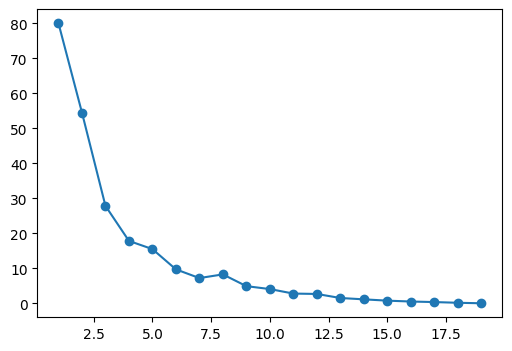

In [5]:
from sklearn.cluster import KMeans
np.random.seed(43)
cluster_range = range( 1, 20 )
cluster_errors = []

for num_clusters in cluster_range:
  clusters = KMeans( num_clusters )
  clusters.fit( b1 )
  cluster_errors.append( clusters.inertia_ )

plt.figure(figsize=(6,4))
plt.plot( cluster_range, cluster_errors, marker = "o" );
#plt.title( "Fig 5: Elbow Diagram");

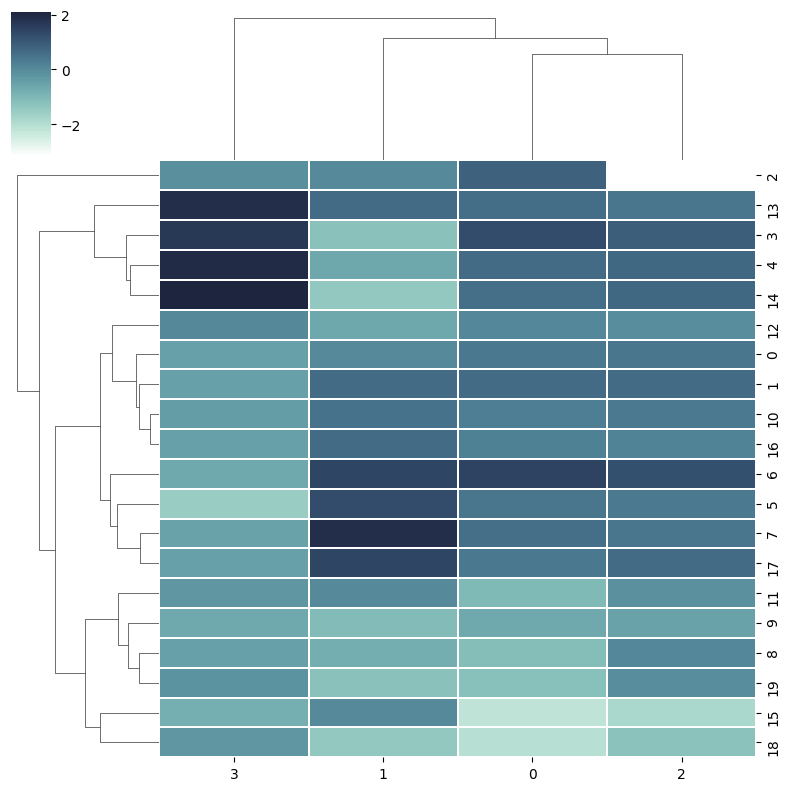

In [6]:
cmap = sn.cubehelix_palette(as_cmap=True, rot=-.3, light=1)
sn.clustermap(b1, cmap=cmap, linewidths=.2,
              figsize = (8,8) );
#plt.title( "Fig 4: Dendrogram of Beer Dataset")

In [7]:
from sklearn.cluster import AgglomerativeClustering
h_clusters = AgglomerativeClustering( 3 )
h_clusters.fit( b1 )
b["h_clusterid"] = h_clusters.labels_
b[b.h_clusterid == 0]

,name,calories,sodium,alcohol,cost,h_clusterid
2,Lowenbrau,157,15,0.9,0.48,0
8,Miller_Lite,99,10,4.3,0.43,0
9,Budweiser_Light,113,8,3.7,0.40,0
11,Coors_Light,102,15,4.1,0.46,0
12,Michelob_Light,135,11,4.2,0.50,0
15,Pabst_Extra_Light,68,15,2.3,0.38,0
18,Olympia_Goled_Light,72,6,2.9,0.46,0
19,Schlitz_Light,97,7,4.2,0.47,0


In [8]:
b[b.h_clusterid == 1]


,name,calories,sodium,alcohol,cost,h_clusterid
0,Budweiser,144,15,4.7,0.43,1
1,Schlitz,151,19,4.9,0.43,1
5,Old_Milwaukee,145,23,4.6,0.28,1
6,Augsberger,175,24,5.5,0.40,1
7,Srohs_Bohemian_Style,149,27,4.7,0.42,1
10,Coors,140,18,4.6,0.44,1
16,Hamms,139,19,4.4,0.43,1
17,Heilemans_Old_Style,144,24,4.9,0.43,1


In [9]:
b[b.h_clusterid == 2]


,name,calories,sodium,alcohol,cost,h_clusterid
3,Kronenbourg,170,7,5.2,0.73,2
4,Heineken,152,11,5.0,0.77,2
13,Becks,150,19,4.7,0.76,2
14,Kirin,149,6,5.0,0.79,2


In [10]:
from sklearn.cluster import AgglomerativeClustering
h_clusters = AgglomerativeClustering( 4 )
h_clusters.fit( b1 )
b["h_clusterid_new"] = h_clusters.labels_
b[b.h_clusterid_new== 0]

,name,calories,sodium,alcohol,cost,h_clusterid,h_clusterid_new
8,Miller_Lite,99,10,4.3,0.43,0,0
9,Budweiser_Light,113,8,3.7,0.40,0,0
11,Coors_Light,102,15,4.1,0.46,0,0
12,Michelob_Light,135,11,4.2,0.50,0,0
15,Pabst_Extra_Light,68,15,2.3,0.38,0,0
18,Olympia_Goled_Light,72,6,2.9,0.46,0,0
19,Schlitz_Light,97,7,4.2,0.47,0,0


In [11]:
b[b.h_clusterid_new== 1]

,name,calories,sodium,alcohol,cost,h_clusterid,h_clusterid_new
0,Budweiser,144,15,4.7,0.43,1,1
1,Schlitz,151,19,4.9,0.43,1,1
5,Old_Milwaukee,145,23,4.6,0.28,1,1
6,Augsberger,175,24,5.5,0.40,1,1
7,Srohs_Bohemian_Style,149,27,4.7,0.42,1,1
10,Coors,140,18,4.6,0.44,1,1
16,Hamms,139,19,4.4,0.43,1,1
17,Heilemans_Old_Style,144,24,4.9,0.43,1,1


In [12]:
b[b.h_clusterid_new== 2]

,name,calories,sodium,alcohol,cost,h_clusterid,h_clusterid_new
3,Kronenbourg,170,7,5.2,0.73,2,2
4,Heineken,152,11,5.0,0.77,2,2
13,Becks,150,19,4.7,0.76,2,2
14,Kirin,149,6,5.0,0.79,2,2


In [13]:
b[b.h_clusterid_new== 3]

,name,calories,sodium,alcohol,cost,h_clusterid,h_clusterid_new
2,Lowenbrau,157,15,0.9,0.48,0,3


In [14]:
# prompt: group b based on h_clusterid_new with mean calories, sodium,alcohol and cost in the columns

b.groupby('h_clusterid_new').agg({'calories':'mean',
                                 'sodium':'mean',
                                 'alcohol':'mean',
                                 'cost':'mean'})

,calories,sodium,alcohol,cost
h_clusterid_new,,,,
0,98.000,10.285714,3.671429,0.442857
1,148.375,21.125000,4.787500,0.407500
2,155.250,10.750000,4.975000,0.762500
3,157.000,15.000000,0.900000,0.480000


cluster 3 - Women, First time drinkers, Socializing